# Unit 5 - Financial Planning

In [118]:
# Initial imports
import os
import requests as req
import pandas as pd
from dotenv import load_dotenv
import yfinance as yf
from MCForecastTools import MCSimulation
import json 

%matplotlib inline

In [119]:
# This section includes all common utilitiy functions that could be used in all other parts of the API

def fetch_ccy_val(url, ccy_id):
    # ccy = currency
    # fetchCurrencyValue returns the current value of a cryto currency depending on the url given 
    # url is the url of the REST API to get the currency value
    # ccy_id is the currency id 
    try:
        res = req.get(url)
        res_j = json.loads(res.content) 
        val = res_j["data"][ccy_id]["quotes"]["USD"]["price"]
        return val
    except req.exceptions.RequestException as e:  
        return -1

def get_history(symbol, period):
    # get_history returns the data frame of stock history and format the columns 
    # plus this returns only records the given preiod 
    ticker = yf.Ticker(symbol)
    hist = ticker.history(period=period) # Since we only need the most recent values, one month history would be sufficient
    hist.drop(columns=["Dividends", "Stock Splits"], inplace=True)
    hist.columns = ["open",	"high",	"low",	"close", "volume"]
    return hist

def get_one_month_history(symbol):
    # get_one_month_history returns the data frame of stock history and format the columns 
    # plus this returns only records for one month
    return get_history(symbol, "1mo")

def get_five_year_history(symbol):
    # get_five_year_history returns the data frame of stock history and format the columns 
    # plus this returns only records for five years 
    return get_history(symbol, "5y")


In [120]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [121]:
# Set current amount of crypto assets
my_btc = 1.2  
my_eth = 5.3

In [122]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [123]:
# Fetch current BTC price
btc_val = fetch_ccy_val(btc_url, "1") 
if btc_val <= 0: 
    raise Exception("Error while fetching bitcoin value")

# Fetch current ETH price
eth_val = fetch_ccy_val(eth_url, "1027")
if eth_val <= 0:
    raise Exception("Error while fetching ETH price")

# Compute current value of my crpto
my_btc_value = btc_val * my_btc
my_eth_value = eth_val * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20253.79
The current value of your 5.3 ETH is $6502.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [124]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [125]:
agg_hist = get_one_month_history("AGG")
spy_hist = get_one_month_history("SPY")

con_hist = pd.concat([agg_hist, spy_hist], axis=1, keys=["AGG", "SPY"])
con_hist.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2022-11-23 00:00:00-05:00  97.131265  97.569237  97.131265  97.569237   
2022-11-25 00:00:00-05:00  97.360204  97.589149  97.360204  97.589149   
2022-11-28 00:00:00-05:00  97.688692  97.738465  97.390069  97.429886   
2022-11-29 00:00:00-05:00  97.091453  97.340304  97.041680  97.081497   
2022-11-30 00:00:00-05:00  97.031732  97.867866  96.842604  97.838005   

                                           SPY                          \
                            volume        open        high         low   
Date                                                                     
2022-11-23 00:00:00-05:00  5885600  397.723629  401.088184  397.484736   
2022-11-25 00:00:00-05:00  2718600  399.993222  401.068302  399.704569   
2022-11-28 00:00:00-05:00  7920700  397.265738  398.977877  393.303919   
2022-11-29 00:00:00-05:00  6643300  394.239630  395.483916  391.502200   
2022-11-30 00:00:00-05:00  8963500  393.682186  405.816467  391.681394   

                                                  
                                close     volume  
Date                                              
2022-11-23 00:00:00-05:00  400.580536   68261600  
2022-11-25 00:00:00-05:00  400.490936   30545400  
2022-11-28 00:00:00-05:00  394.100281   67881600  
2022-11-29 00:00:00-05:00  393.423401   52310000  
2022-11-30 00:00:00-05:00  405.816467  144566700

In [126]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = agg_hist["close"][-1]
spy_close_price = spy_hist["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.30999755859375
Current SPY closing price: $380.7200012207031


In [127]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19036.00
The current value of your 200 AGG shares is $19662.00


### Savings Health Analysis

In [128]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_val = my_btc_value + my_eth_value
share_val = my_agg_value + my_spy_value

# Create savings DataFrame
data = { "amount":[crypto_val, share_val] }
df_savings = pd.DataFrame(data, index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,26756.044000
shares,38697.999573


<AxesSubplot:ylabel='amount'>

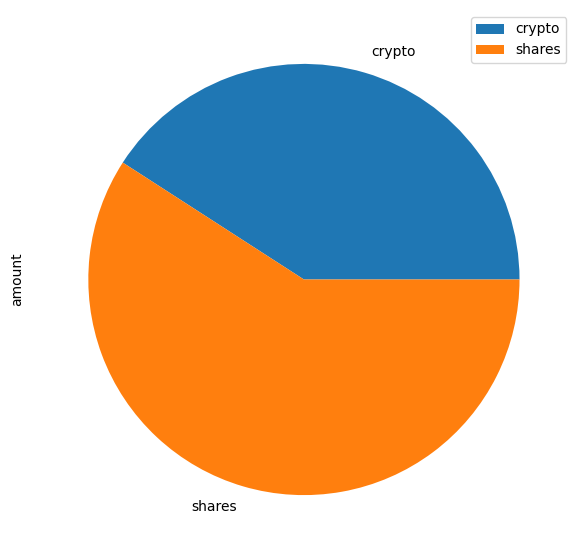

In [129]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", figsize=(7, 7))

In [130]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()["amount"]

# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print("Congratulations! You have reached this financial goal.")
else:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [134]:
# Get 5 years' worth of historical data for SPY and AGG
agg_history_5 = get_five_year_history("AGG")
spy_history_5 = get_five_year_history("SPY")

# Reorganize the DataFrame
df_stock_data = pd.concat([agg_history_5, spy_history_5], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-26 00:00:00-05:00  96.677361  96.766127  96.641853  96.721741   
2017-12-27 00:00:00-05:00  96.774965  97.050151  96.774965  97.023521   
2017-12-28 00:00:00-05:00  96.952538  96.988046  96.881521  96.952538   
2017-12-29 00:00:00-05:00  97.005769  97.103414  96.970261  97.050156   
2018-01-02 00:00:00-05:00  96.988014  97.032394  96.730586  96.908119   

                                           SPY                          \
                            volume        open        high         low   
Date                                                                     
2017-12-26 00:00:00-05:00  1873400  245.187488  245.545573  245.040611   
2017-12-27 00:00:00-05:00  2046900  245.490480  245.811832  245.150775   
2017-12-28 00:00:00-05:00  2895400  245.958688  245.986231  245.554707   
2017-12-29 00:00:00-05:00  2813400  246.546249  246.564602  244.810992   
2018-01-02 00:00:00-05:00  8850900  245.912821  246.803411  245.508840   

                                                 
                                close    volume  
Date                                             
2017-12-26 00:00:00-05:00  245.316040  45244400  
2017-12-27 00:00:00-05:00  245.435394  57751000  
2017-12-28 00:00:00-05:00  245.940308  45116100  
2017-12-29 00:00:00-05:00  245.012955  96007400  
2018-01-02 00:00:00-05:00  246.766678  86655700

In [139]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
weight = (0.4, 0.6) # 40%-AGG and 60%-SPY 

# Configure a Monte Carlo simulation to forecast three years daily returns
weighted_simulator = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30,
    weights=weight
)

In [141]:
# Printing the simulation input data
weighted_simulator.portfolio_data.head()

AGG                                   \
                                open       high        low      close   
Date                                                                    
2017-12-26 00:00:00-05:00  96.677361  96.766127  96.641853  96.721741   
2017-12-27 00:00:00-05:00  96.774965  97.050151  96.774965  97.023521   
2017-12-28 00:00:00-05:00  96.952538  96.988046  96.881521  96.952538   
2017-12-29 00:00:00-05:00  97.005769  97.103414  96.970261  97.050156   
2018-01-02 00:00:00-05:00  96.988014  97.032394  96.730586  96.908119   

                                                        SPY              \
                            volume daily_return        open        high   
Date                                                                      
2017-12-26 00:00:00-05:00  1873400          NaN  245.187488  245.545573   
2017-12-27 00:00:00-05:00  2046900     0.003120  245.490480  245.811832   
2017-12-28 00:00:00-05:00  2895400    -0.000732  245.958688  245.986231   
2017-12-29 00:00:00-05:00  2813400     0.001007  246.546249  246.564602   
2018-01-02 00:00:00-05:00  8850900    -0.001464  245.912821  246.803411   

                                                                          
                                  low       close    volume daily_return  
Date                                                                      
2017-12-26 00:00:00-05:00  245.040611  245.316040  45244400          NaN  
2017-12-27 00:00:00-05:00  245.150775  245.435394  57751000     0.000487  
2017-12-28 00:00:00-05:00  245.554707  245.940308  45116100     0.002057  
2017-12-29 00:00:00-05:00  244.810992  245.012955  96007400    -0.003771  
2018-01-02 00:00:00-05:00  245.508840  246.766678  86655700     0.007158

In [142]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
weighted_simulator.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


a:\UOT\fintech\assignments\module-5-assignment-financial-forecast\MCForecastTools.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013428,0.991577,0.992496,1.002630,0.991668,1.012867,1.011841,1.005830,0.999709,0.998015,...,0.996185,1.004021,1.004192,1.009550,1.003046,0.988355,1.001081,1.006400,0.995144,1.004022
2,1.017201,0.983027,0.995031,0.986506,0.982942,1.007868,1.009144,1.021447,1.000219,1.007902,...,0.997424,1.008075,1.002500,1.032223,1.004254,0.981692,1.001599,1.006099,0.986881,0.994742
3,1.022998,0.979768,0.987597,0.982577,0.995040,0.985870,0.997005,1.019341,1.003879,1.010487,...,0.998863,1.000997,0.994423,1.035356,1.002651,0.982013,1.010822,1.009621,0.997054,0.990816
4,1.009152,0.975344,0.994208,0.987199,1.003011,0.988987,0.994168,1.023270,0.992935,1.020393,...,1.008711,0.987153,0.994631,1.036785,1.011053,0.977101,1.009034,1.005011,0.996096,0.991165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.575738,13.558743,8.118826,5.485125,6.928697,7.751034,7.482216,3.050592,2.414344,9.700315,...,3.124148,3.041500,14.160584,2.091822,2.570026,17.443190,2.268198,2.010214,10.982145,7.607361
7557,9.406386,13.651808,8.127816,5.491156,6.955995,7.804276,7.567488,3.057699,2.428864,9.525580,...,3.097768,3.074867,14.033107,2.089642,2.588511,17.237556,2.265088,2.034717,11.002239,7.566221
7558,9.337543,13.436452,8.104795,5.508153,6.953952,7.788483,7.483869,3.044469,2.429179,9.579765,...,3.151266,3.123463,14.099792,2.046019,2.567696,17.316713,2.278882,2.050330,11.038198,7.567477
7559,9.322824,13.421176,8.039036,5.499057,6.884708,7.806771,7.490264,3.014452,2.430673,9.515708,...,3.147976,3.104033,14.047825,2.074131,2.564416,17.390680,2.311016,2.069429,11.113816,7.543247


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

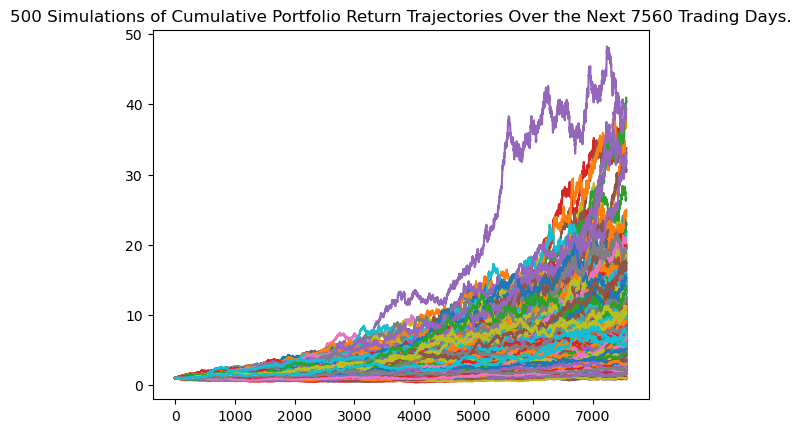

In [143]:
# Plot simulation outcomes
weighted_simulator.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

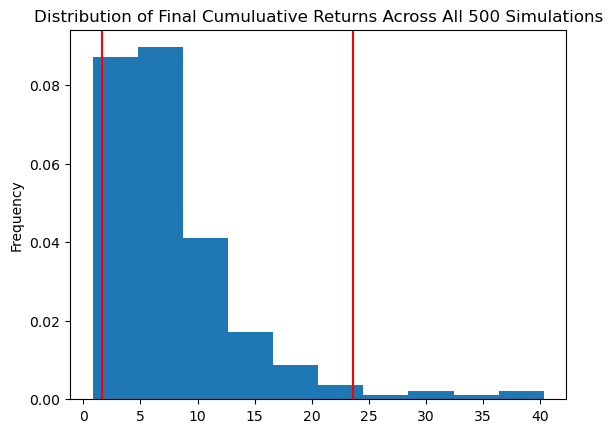

In [146]:
# Plot probability distribution and confidence intervals
weighted_simulator.plot_distribution()

### Retirement Analysis

In [147]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = weighted_simulator.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              7.820515
std               6.054070
min               0.823915
25%               3.794590
50%               6.257949
75%               9.538983
max              40.323177
95% CI Lower      1.650323
95% CI Upper     23.643614
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [152]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = tbl[8]*initial_investment
ci_upper = tbl[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $33006.46 and $472872.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [154]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = tbl[8]*initial_investment
ci_upper = tbl[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $49509.68 and $709308.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


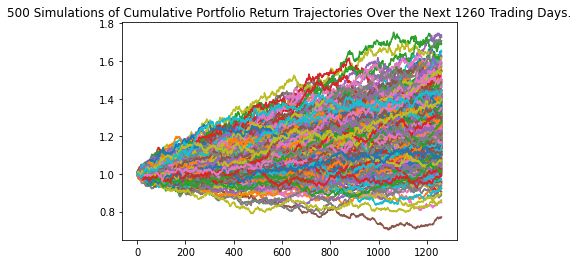

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

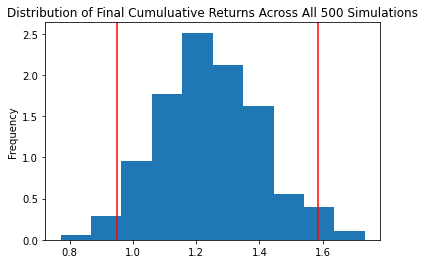

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


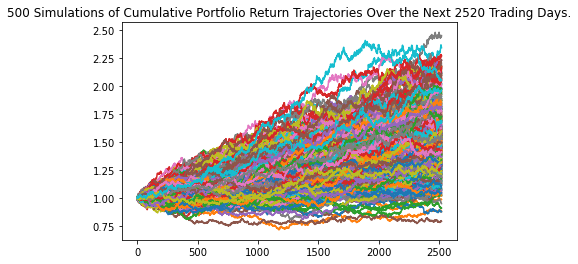

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

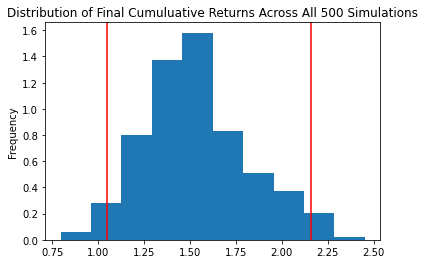

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
